# Install fred-api

In [1]:
!pip install fredapi > /dev/null

In [2]:
## pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install
%config Completer.use_jedi = False

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = 'put_your_key_here'

from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
fred_key = user_secrets.get_secret("fred-api")


# 1.Create The Fred Object

In [4]:
fred = Fred(api_key=fred_key)

# 2.Search for economic data

In [5]:
sp_search = fred.search('S&P', order_by='popularity')

In [6]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2022-05-23,2022-05-23,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2022-05-19,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-05-20 09:50:02-05:00,95,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2022-05-23,2022-05-23,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-02-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-04-26 08:04:02-05:00,90,"For more information regarding the index, plea..."
SP500,SP500,2022-05-23,2022-05-23,S&P 500,2012-05-21,2022-05-20,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-05-20 19:13:45-05:00,85,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2022-05-23,2022-05-23,ICE BofA US High Yield Index Effective Yield,1996-12-31,2022-05-19,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-05-20 09:50:09-05:00,84,This data represents the effective yield of th...
MEHOINUSA672N,MEHOINUSA672N,2022-05-23,2022-05-23,Real Median Household Income in the United States,1984-01-01,2020-01-01,Annual,A,2020 CPI-U-RS Adjusted Dollars,2020 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2021-09-15 08:45:01-05:00,82,Household data are collected as of March. As ...


# 3. Pull Raw Data

In [7]:
sp500 = fred.get_series(series_id='SP500')

# 4. Plot Raw data

<AxesSubplot:title={'center':'SP500'}>

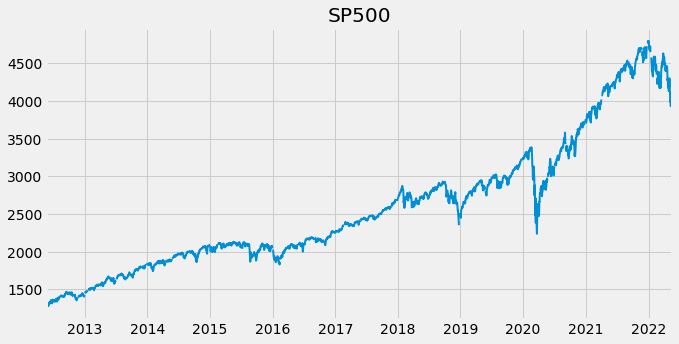

In [8]:
sp500.plot(figsize=(10,5), title='SP500', lw=2)

# 5. Pull and Join Multiple Data Series

In [9]:
unemp_results = fred.search('unemployment')

In [10]:
unrate = fred.get_series('UNRATE')

<AxesSubplot:>

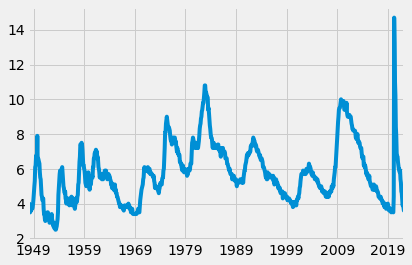

In [11]:
unrate.plot()

In [12]:
 fred.search('unemployment state')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-05-23,2022-05-23,Unemployment Rate,1948-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:02-05:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-05-23,2022-05-23,Unemployment Rate,1948-01-01,2022-04-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-05-06 07:43:03-05:00,54,The unemployment rate represents the number of...
NROU,NROU,2022-05-23,2022-05-23,Noncyclical Rate of Unemployment,1949-01-01,2031-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2021-02-01 14:37:05-06:00,68,"Starting with the July, 2021 report: An Update..."
LNS14000006,LNS14000006,2022-05-23,2022-05-23,Unemployment Rate - Black or African American,1972-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:05-05:00,68,The series comes from the 'Current Population ...
CCSA,CCSA,2022-05-23,2022-05-23,Continued Claims (Insured Unemployment),1967-01-07,2022-05-07,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2022-05-19 07:38:04-05:00,65,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN260810000000003A,LAUCN260810000000003A,2022-05-23,2022-05-23,"Unemployment Rate in Kent County, MI",1990-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:54:29-05:00,1,These data come from the Current Population Su...
LAUCN551010000000003A,LAUCN551010000000003A,2022-05-23,2022-05-23,"Unemployment Rate in Racine County, WI",1990-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:50:07-05:00,1,These data come from the Current Population Su...
CNEWUR,CNEWUR,2022-05-23,2022-05-23,Unemployment Rate in New England Census Division,1976-01-01,2022-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-04-18 09:17:24-05:00,4,None


In [13]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))

In [14]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-05-23,2022-05-23,Unemployment Rate,1948-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:02-05:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-05-23,2022-05-23,Unemployment Rate,1948-01-01,2022-04-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-05-06 07:43:03-05:00,54,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2022-05-23,2022-05-23,Unemployment Rate - Black or African American,1972-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:05-05:00,68,The series comes from the 'Current Population ...
LNU04000006,LNU04000006,2022-05-23,2022-05-23,Unemployment Rate - Black or African American,1972-01-01,2022-04-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-05-06 07:43:11-05:00,22,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2022-05-23,2022-05-23,Unemployment Level,1948-01-01,2022-04-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-05-06 07:44:10-05:00,65,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAUNIO1URN,GAUNIO1URN,2022-05-23,2022-05-23,"Unemployment Rate in Union County, GA",1990-01-01,2022-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:21:23-05:00,5,These data come from the Current Population Su...
FLOKEE3URN,FLOKEE3URN,2022-05-23,2022-05-23,"Unemployment Rate in Okeechobee County, FL",1990-01-01,2022-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:14:23-05:00,5,These data come from the Current Population Su...
MOGRURN,MOGRURN,2022-05-23,2022-05-23,"Unemployment Rate in Greene County, MO",1990-01-01,2022-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:12:08-05:00,5,These data come from the Current Population Su...


# 6.filter down using query

In [15]:
unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-05-23,2022-05-23,Unemployment Rate,1948-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:02-05:00,93,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2022-05-23,2022-05-23,Unemployment Rate - Black or African American,1972-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:05-05:00,68,The series comes from the 'Current Population ...
U6RATE,U6RATE,2022-05-23,2022-05-23,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:11-05:00,64,The series comes from the 'Current Population ...
LNS14000031,LNS14000031,2022-05-23,2022-05-23,"Unemployment Rate - 20 Yrs. & over, Black or A...",1972-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:15-05:00,58,The series comes from the 'Current Population ...
CAUR,CAUR,2022-05-23,2022-05-23,Unemployment Rate in California,1976-01-01,2022-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-04-18 09:18:02-05:00,57,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LBSSA56,LBSSA56,2022-05-23,2022-05-23,Labor Force Participation Rate for Wyoming,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-20 09:01:29-05:00,6,A state's labor-force participation rate is th...
LNS13008397,LNS13008397,2022-05-23,2022-05-23,"Of Total Unemployed, Percent Unemployed Less T...",1948-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:52-05:00,6,The series comes from the 'Current Population ...
LBSSA11,LBSSA11,2022-05-23,2022-05-23,Labor Force Participation Rate for District Of...,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-20 09:01:34-05:00,5,A state's labor-force participation rate is th...


In [16]:
unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"').shape

(158, 15)

In [17]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [18]:
unemp_df['title']

series id
UNRATE                                         Unemployment Rate
LNS14000006        Unemployment Rate - Black or African American
U6RATE         Total Unemployed, Plus All Persons Marginally ...
LNS14000031    Unemployment Rate - 20 Yrs. & over, Black or A...
CAUR                             Unemployment Rate in California
                                     ...                        
LBSSA56               Labor Force Participation Rate for Wyoming
LNS13008397    Of Total Unemployed, Percent Unemployed Less T...
LBSSA11        Labor Force Participation Rate for District Of...
CSOUUR                  Unemployment Rate in South Census Region
LNS14000091                       Unemployment Rate - 35-44 Yrs.
Name: title, Length: 158, dtype: object

In [19]:
unemp_df['title'].str.contains('Unemployment Rate')

series id
UNRATE          True
LNS14000006     True
U6RATE         False
LNS14000031     True
CAUR            True
               ...  
LBSSA56        False
LNS13008397    False
LBSSA11        False
CSOUUR          True
LNS14000091     True
Name: title, Length: 158, dtype: bool

In [20]:
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')] 

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2022-05-23,2022-05-23,Unemployment Rate in California,1976-01-01,2022-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-04-18 09:18:02-05:00,57,None
TXUR,TXUR,2022-05-23,2022-05-23,Unemployment Rate in Texas,1976-01-01,2022-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-04-18 09:17:02-05:00,51,None
FLUR,FLUR,2022-05-23,2022-05-23,Unemployment Rate in Florida,1976-01-01,2022-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-04-18 09:18:02-05:00,51,None
NYUR,NYUR,2022-05-23,2022-05-23,Unemployment Rate in New York,1976-01-01,2022-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-04-18 09:17:03-05:00,48,None
OHUR,OHUR,2022-05-23,2022-05-23,Unemployment Rate in Ohio,1976-01-01,2022-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-04-18 09:17:04-05:00,42,None
PAUR,PAUR,2022-05-23,2022-05-23,Unemployment Rate in Pennsylvania,1976-01-01,2022-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-04-18 09:17:04-05:00,40,None
VAUR,VAUR,2022-05-23,2022-05-23,Unemployment Rate in Virginia,1976-01-01,2022-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-04-18 09:17:10-05:00,36,None
ALUR,ALUR,2022-05-23,2022-05-23,Unemployment Rate in Alabama,1976-01-01,2022-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-04-18 09:18:03-05:00,34,None
ILUR,ILUR,2022-05-23,2022-05-23,Unemployment Rate in Illinois,1976-01-01,2022-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-04-18 09:18:07-05:00,24,None


In [21]:
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')].shape

(60, 15)

In [22]:
up_unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]

# loop to get the series ID's, and drop non- State ID's 

In [23]:
up_unemp_df.index

Index(['CAUR', 'TXUR', 'FLUR', 'NYUR', 'OHUR', 'PAUR', 'VAUR', 'ALUR', 'ILUR',
       'NJUR', 'MIUR', 'NCUR', 'SCUR', 'IAUR', 'KYUR', 'LAUR', 'COUR', 'GAUR',
       'WIUR', 'INUR', 'MNUR', 'AZUR', 'LASMT261982000000003', 'TNUR', 'MOUR',
       'NVUR', 'NMUR', 'HIUR', 'WAUR', 'ORUR', 'MAUR', 'WVUR', 'AKUR', 'MSUR',
       'ARUR', 'UTUR', 'OKUR', 'NEUR', 'CTUR', 'NDUR', 'MDUR', 'KSUR',
       'LASMT391746000000003', 'MTUR', 'IDUR', 'SDUR', 'DCUR', 'MEUR', 'NHUR',
       'PRUR', 'DEUR', 'WYUR', 'RIUR', 'VTUR', 'CNERUR', 'CMWRUR', 'USAURAMS',
       'CNEWUR', 'CWSTUR', 'CSOUUR'],
      dtype='object', name='series id')

In [24]:
len(up_unemp_df.index)

60

In [25]:
all_results = []

for myid in up_unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [26]:
pd.concat(all_results, axis=1)

,CAUR,TXUR,FLUR,NYUR,OHUR,PAUR,VAUR,ALUR,ILUR,NJUR,MIUR,NCUR,SCUR,IAUR,KYUR,LAUR,COUR,GAUR,WIUR,INUR,MNUR,AZUR,LASMT261982000000003,TNUR,MOUR,NVUR,NMUR,HIUR,WAUR,ORUR,MAUR,WVUR,AKUR,MSUR,ARUR,UTUR,OKUR,NEUR,CTUR,NDUR,MDUR,KSUR,LASMT391746000000003,MTUR,IDUR,SDUR,DCUR,MEUR,NHUR,PRUR,DEUR,WYUR,RIUR,VTUR,CNERUR,CMWRUR,USAURAMS,CNEWUR,CWSTUR,CSOUUR
1976-01-01,9.2,5.8,9.7,10.3,8.1,8.0,6.1,6.6,6.6,10.3,9.9,6.4,7.4,4.3,5.6,6.3,5.8,8.4,5.8,6.6,6.0,10.2,NaN,6.0,5.9,9.2,8.6,9.8,8.5,9.5,10.5,7.5,7.1,6.7,7.3,5.8,5.8,3.3,9.8,3.4,6.4,4.2,NaN,5.8,5.6,3.3,8.7,8.7,6.5,19.6,8.0,4.1,7.8,8.6,9.6,6.8,NaN,9.6,8.6,6.9
1976-02-01,9.2,5.8,9.7,10.3,8.1,8.1,6.1,6.6,6.6,10.3,9.9,6.4,7.4,4.3,5.6,6.3,5.7,8.4,5.8,6.6,6.0,10.2,NaN,6.0,5.9,9.2,8.7,9.8,8.5,9.5,10.5,7.5,7.1,6.7,7.3,5.9,5.8,3.3,9.8,3.4,6.4,4.2,NaN,5.8,5.6,3.3,8.7,8.7,6.5,19.5,8.0,4.1,7.8,8.6,9.6,6.8,NaN,9.6,8.6,6.9
1976-03-01,9.1,5.9,9.6,10.2,8.1,8.1,6.1,6.6,6.6,10.3,9.9,6.4,7.3,4.3,5.6,6.3,5.7,8.4,5.7,6.5,5.9,10.1,NaN,6.0,5.9,9.2,8.7,9.8,8.4,9.4,10.5,7.5,7.0,6.6,7.3,5.8,5.8,3.3,9.8,3.4,6.4,4.2,NaN,5.8,5.6,3.2,8.6,8.6,6.5,19.3,8.0,4.1,7.7,8.6,9.6,6.8,NaN,9.6,8.6,6.9
1976-04-01,9.1,5.9,9.5,10.2,8.0,8.1,6.0,6.5,6.6,10.3,9.8,6.3,7.2,4.2,5.6,6.4,5.6,8.3,5.6,6.3,5.8,10.0,NaN,6.0,6.0,9.0,8.6,9.7,8.5,9.2,10.3,7.5,6.9,6.4,7.2,5.8,5.8,3.2,9.6,3.5,6.4,4.2,NaN,5.8,5.6,3.1,8.5,8.6,6.5,19.0,8.1,4.0,7.7,8.6,9.5,6.7,NaN,9.4,8.5,6.8
1976-05-01,9.0,5.9,9.3,10.1,7.8,8.1,5.9,6.4,6.6,10.3,9.6,6.1,7.0,4.1,5.5,6.5,5.6,8.1,5.5,6.0,5.7,9.8,NaN,5.9,6.0,8.9,8.6,9.4,8.5,9.1,10.1,7.4,6.9,6.3,7.1,5.7,5.7,3.1,9.4,3.6,6.5,4.2,NaN,5.8,5.6,3.1,8.4,8.5,6.5,18.9,8.3,3.9,7.7,8.5,9.5,6.6,NaN,9.3,8.5,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,5.8,4.9,3.5,5.4,4.5,5.5,3.3,3.1,5.1,5.1,5.2,4.2,3.6,3.9,4.6,4.5,4.3,3.3,3.1,2.7,3.1,3.9,5.4,3.6,3.9,5.3,6.0,4.4,4.5,4.2,4.8,4.3,5.5,4.7,3.3,2.3,2.8,2.4,5.2,3.1,5.4,2.8,5.3,2.9,3.2,2.9,6.1,4.2,3.0,7.5,4.8,4.0,4.7,3.1,5.2,4.0,NaN,4.6,5.0,4.1
2021-12-01,5.8,4.8,3.5,5.4,4.5,5.5,3.3,3.1,5.1,5.1,5.1,4.1,3.6,3.9,4.6,4.4,4.2,3.3,3.1,2.7,3.0,3.9,5.3,3.6,3.9,5.3,5.9,4.3,4.5,4.2,4.6,4.3,5.5,4.7,3.3,2.3,2.8,2.3,5.1,3.1,5.4,2.8,5.3,2.9,3.1,2.9,6.1,4.1,3.0,7.5,4.8,4.0,4.5,3.1,5.1,4.0,NaN,4.5,5.0,4.0
2022-01-01,5.7,4.8,3.5,5.3,4.3,5.4,3.3,3.1,5.0,5.1,4.9,3.9,3.5,3.7,4.4,4.3,4.2,3.2,3.0,2.4,2.9,3.7,5.1,3.5,3.8,5.2,5.9,4.3,4.4,4.2,4.8,4.1,5.6,4.6,3.2,2.2,2.7,2.2,5.3,3.1,5.4,2.6,5.3,2.7,3.0,2.8,6.3,4.1,2.9,7.1,4.8,3.8,4.2,3.0,5.1,3.8,NaN,4.6,4.8,3.9
2022-02-01,5.3,4.7,3.3,4.9,4.2,5.1,3.2,3.0,4.8,4.6,4.7,3.7,3.5,3.5,4.2,4.3,4.0,3.2,2.9,2.3,2.7,3.6,5.0,3.4,3.7,5.1,5.6,4.2,4.3,4.0,4.7,3.9,5.3,4.5,3.1,2.1,2.6,2.1,4.9,2.9,5.0,2.5,5.3,2.6,2.8,2.6,6.1,4.0,2.7,6.8,4.6,3.6,3.9,2.9,4.8,3.7,NaN,4.3,4.6,3.8


In [27]:
unemp_results = pd.concat(all_results, axis=1).drop(['LASMT261982000000003','LASMT391746000000003','CNERUR','CMWRUR','CWSTUR','USAURAMS','CNEWUR','CSOUUR','PRUR'], axis=1)
id_to_state = up_unemp_df['title'].str.replace( 'Unemployment Rate in ','').to_dict()
unemp_results.columns = [ id_to_state[c] for c in unemp_results.columns]

In [28]:
unemp_results

,California,Texas,Florida,New York,Ohio,Pennsylvania,Virginia,Alabama,Illinois,New Jersey,Michigan,North Carolina,South Carolina,Iowa,Kentucky,Louisiana,Colorado,Georgia,Wisconsin,Indiana,Minnesota,Arizona,Tennessee,Missouri,Nevada,New Mexico,Hawaii,Washington,Oregon,Massachusetts,West Virginia,Alaska,Mississippi,Arkansas,Utah,Oklahoma,Nebraska,Connecticut,North Dakota,Maryland,Kansas,Montana,Idaho,South Dakota,the District of Columbia,Maine,New Hampshire,Delaware,Wyoming,Rhode Island,Vermont
1976-01-01,9.2,5.8,9.7,10.3,8.1,8.0,6.1,6.6,6.6,10.3,9.9,6.4,7.4,4.3,5.6,6.3,5.8,8.4,5.8,6.6,6.0,10.2,6.0,5.9,9.2,8.6,9.8,8.5,9.5,10.5,7.5,7.1,6.7,7.3,5.8,5.8,3.3,9.8,3.4,6.4,4.2,5.8,5.6,3.3,8.7,8.7,6.5,8.0,4.1,7.8,8.6
1976-02-01,9.2,5.8,9.7,10.3,8.1,8.1,6.1,6.6,6.6,10.3,9.9,6.4,7.4,4.3,5.6,6.3,5.7,8.4,5.8,6.6,6.0,10.2,6.0,5.9,9.2,8.7,9.8,8.5,9.5,10.5,7.5,7.1,6.7,7.3,5.9,5.8,3.3,9.8,3.4,6.4,4.2,5.8,5.6,3.3,8.7,8.7,6.5,8.0,4.1,7.8,8.6
1976-03-01,9.1,5.9,9.6,10.2,8.1,8.1,6.1,6.6,6.6,10.3,9.9,6.4,7.3,4.3,5.6,6.3,5.7,8.4,5.7,6.5,5.9,10.1,6.0,5.9,9.2,8.7,9.8,8.4,9.4,10.5,7.5,7.0,6.6,7.3,5.8,5.8,3.3,9.8,3.4,6.4,4.2,5.8,5.6,3.2,8.6,8.6,6.5,8.0,4.1,7.7,8.6
1976-04-01,9.1,5.9,9.5,10.2,8.0,8.1,6.0,6.5,6.6,10.3,9.8,6.3,7.2,4.2,5.6,6.4,5.6,8.3,5.6,6.3,5.8,10.0,6.0,6.0,9.0,8.6,9.7,8.5,9.2,10.3,7.5,6.9,6.4,7.2,5.8,5.8,3.2,9.6,3.5,6.4,4.2,5.8,5.6,3.1,8.5,8.6,6.5,8.1,4.0,7.7,8.6
1976-05-01,9.0,5.9,9.3,10.1,7.8,8.1,5.9,6.4,6.6,10.3,9.6,6.1,7.0,4.1,5.5,6.5,5.6,8.1,5.5,6.0,5.7,9.8,5.9,6.0,8.9,8.6,9.4,8.5,9.1,10.1,7.4,6.9,6.3,7.1,5.7,5.7,3.1,9.4,3.6,6.5,4.2,5.8,5.6,3.1,8.4,8.5,6.5,8.3,3.9,7.7,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,5.8,4.9,3.5,5.4,4.5,5.5,3.3,3.1,5.1,5.1,5.2,4.2,3.6,3.9,4.6,4.5,4.3,3.3,3.1,2.7,3.1,3.9,3.6,3.9,5.3,6.0,4.4,4.5,4.2,4.8,4.3,5.5,4.7,3.3,2.3,2.8,2.4,5.2,3.1,5.4,2.8,2.9,3.2,2.9,6.1,4.2,3.0,4.8,4.0,4.7,3.1
2021-12-01,5.8,4.8,3.5,5.4,4.5,5.5,3.3,3.1,5.1,5.1,5.1,4.1,3.6,3.9,4.6,4.4,4.2,3.3,3.1,2.7,3.0,3.9,3.6,3.9,5.3,5.9,4.3,4.5,4.2,4.6,4.3,5.5,4.7,3.3,2.3,2.8,2.3,5.1,3.1,5.4,2.8,2.9,3.1,2.9,6.1,4.1,3.0,4.8,4.0,4.5,3.1
2022-01-01,5.7,4.8,3.5,5.3,4.3,5.4,3.3,3.1,5.0,5.1,4.9,3.9,3.5,3.7,4.4,4.3,4.2,3.2,3.0,2.4,2.9,3.7,3.5,3.8,5.2,5.9,4.3,4.4,4.2,4.8,4.1,5.6,4.6,3.2,2.2,2.7,2.2,5.3,3.1,5.4,2.6,2.7,3.0,2.8,6.3,4.1,2.9,4.8,3.8,4.2,3.0
2022-02-01,5.3,4.7,3.3,4.9,4.2,5.1,3.2,3.0,4.8,4.6,4.7,3.7,3.5,3.5,4.2,4.3,4.0,3.2,2.9,2.3,2.7,3.6,3.4,3.7,5.1,5.6,4.2,4.3,4.0,4.7,3.9,5.3,4.5,3.1,2.1,2.6,2.1,4.9,2.9,5.0,2.5,2.6,2.8,2.6,6.1,4.0,2.7,4.6,3.6,3.9,2.9


In [29]:
unemp_results.isna().sum(axis=1)

1976-01-01    0
1976-02-01    0
1976-03-01    0
1976-04-01    0
1976-05-01    0
             ..
2021-11-01    0
2021-12-01    0
2022-01-01    0
2022-02-01    0
2022-03-01    0
Freq: MS, Length: 555, dtype: int64

In [30]:
# plot States Unemployment Rate 
px.line(unemp_results)


# April 2020 Unemployment Rate Per state

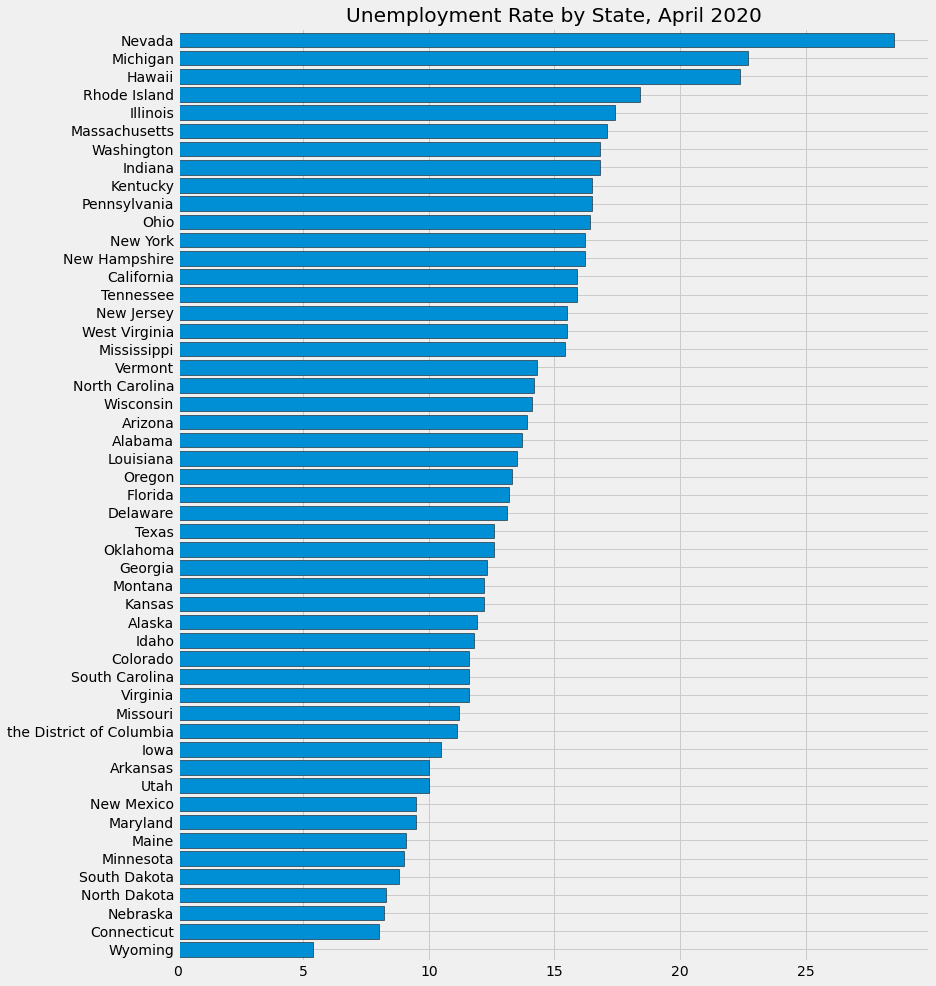

In [31]:
barchar = unemp_results.loc[unemp_results.index == '2020-04-01'].T \
.sort_values('2020-04-01') \
.plot(kind='barh', figsize=(12, 16), width= 0.8 , edgecolor='black', title='Unemployment Rate by State, April 2020')

barchar.legend().remove()

# Pull Participation Rate

In [32]:
part_df = fred.search('A states labor-force participation rate', filter=('frequency','Monthly')) 
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')


In [33]:
part_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LBSSA06,LBSSA06,2022-05-23,2022-05-23,Labor Force Participation Rate for California,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-20 09:01:02-05:00,28,A state's labor-force participation rate is th...
LBSSA12,LBSSA12,2022-05-23,2022-05-23,Labor Force Participation Rate for Florida,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-20 09:01:01-05:00,28,A state's labor-force participation rate is th...
LBSSA21,LBSSA21,2022-05-23,2022-05-23,Labor Force Participation Rate for Kentucky,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-20 09:01:09-05:00,28,A state's labor-force participation rate is th...
LBSSA55,LBSSA55,2022-05-23,2022-05-23,Labor Force Participation Rate for Wisconsin,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-20 09:01:06-05:00,28,A state's labor-force participation rate is th...
LBSSA01,LBSSA01,2022-05-23,2022-05-23,Labor Force Participation Rate for Alabama,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-20 09:01:16-05:00,12,A state's labor-force participation rate is th...
LBSSA48,LBSSA48,2022-05-23,2022-05-23,Labor Force Participation Rate for Texas,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-20 09:01:05-05:00,26,A state's labor-force participation rate is th...
LBSSA27,LBSSA27,2022-05-23,2022-05-23,Labor Force Participation Rate for Minnesota,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-20 09:01:03-05:00,26,A state's labor-force participation rate is th...
LBSSA39,LBSSA39,2022-05-23,2022-05-23,Labor Force Participation Rate for Ohio,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-20 09:01:15-05:00,13,A state's labor-force participation rate is th...
LBSSA26,LBSSA26,2022-05-23,2022-05-23,Labor Force Participation Rate for Michigan,1976-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-20 09:01:08-05:00,24,A state's labor-force participation rate is th...


In [34]:
part_df.shape

(51, 15)

In [35]:
part_id_to_state = part_df['title'].str.replace( 'Labor Force Participation Rate for ','').to_dict()
all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
part_states = pd.concat(all_results, axis=1)
part_states.columns = [ part_id_to_state[c] for c in part_states.columns]

In [36]:
part_states

,California,Florida,Kentucky,Wisconsin,Alabama,Texas,Minnesota,Ohio,Michigan,North Carolina,Utah,New York,West Virginia,Colorado,New Mexico,Pennsylvania,Indiana,Washington,Iowa,New Jersey,Illinois,Georgia,Kansas,Maryland,Tennessee,Virginia,Arizona,Louisiana,Missouri,Nebraska,Massachusetts,Idaho,South Carolina,Rhode Island,Nevada,Oklahoma,South Dakota,Connecticut,Arkansas,Delaware,Alaska,Mississippi,Oregon,Montana,Vermont,Maine,New Hampshire,North Dakota,Hawaii,Wyoming,District Of Columbia
1976-01-01,62.6,55.8,60.5,65.6,57.0,63.8,65.6,61.7,61.6,66.5,62.8,58.0,52.5,67.2,60.8,58.4,64.0,60.9,64.4,61.5,63.0,63.7,65.1,64.3,59.6,65.9,59.5,56.8,60.5,64.9,64.8,63.0,65.3,63.8,71.3,59.3,64.6,64.2,57.9,62.7,69.0,58.8,62.9,62.7,63.6,62.1,65.9,62.6,69.9,65.3,64.4
1976-02-01,62.4,55.7,60.3,65.5,56.9,63.5,65.5,61.7,61.5,66.3,62.6,58.0,52.4,67.0,60.5,58.3,63.9,60.7,64.3,61.4,63.0,63.6,65.0,64.2,59.4,65.8,59.2,56.6,60.3,64.9,64.7,62.8,65.2,63.7,70.8,59.2,64.4,64.1,57.8,62.5,68.4,58.6,62.7,62.5,63.4,61.9,65.6,62.4,69.6,64.9,64.5
1976-03-01,62.2,55.5,60.2,65.4,56.8,63.4,65.4,61.7,61.5,66.2,62.5,58.0,52.3,66.8,60.3,58.3,63.8,60.6,64.2,61.4,62.9,63.5,64.9,64.1,59.3,65.6,59.1,56.5,60.3,64.8,64.6,62.7,65.0,63.6,70.5,59.1,64.4,64.0,57.7,62.5,67.8,58.5,62.5,62.4,63.2,61.9,65.6,62.3,69.6,64.7,64.5
1976-04-01,62.2,55.5,60.1,65.4,56.8,63.5,65.4,61.6,61.6,66.2,62.5,58.0,52.3,66.6,60.3,58.3,63.8,60.6,64.1,61.5,62.9,63.5,65.0,64.1,59.3,65.5,59.1,56.4,60.4,64.8,64.6,62.7,64.9,63.7,70.4,59.0,64.3,64.1,57.7,62.4,67.9,58.5,62.4,62.3,63.5,61.8,65.7,62.5,69.4,64.9,64.5
1976-05-01,62.3,55.4,60.1,65.5,56.8,63.6,65.5,61.6,61.7,66.3,62.6,58.1,52.2,66.5,60.3,58.3,63.9,60.7,64.1,61.6,63.0,63.6,65.1,64.1,59.4,65.4,59.1,56.4,60.6,64.8,64.6,62.8,64.7,63.6,70.5,59.0,64.3,64.3,57.7,62.4,67.9,58.5,62.5,62.2,63.6,61.7,66.0,62.6,69.3,65.2,64.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,61.1,58.4,57.9,66.4,56.2,63.1,67.3,61.5,59.3,59.6,67.5,58.9,54.9,68.2,56.4,61.0,61.9,63.9,66.7,62.6,63.3,61.6,66.1,65.4,60.3,62.6,60.7,57.8,63.0,69.7,65.5,61.8,57.1,63.3,59.5,60.1,68.3,63.2,56.2,61.2,65.6,54.8,62.2,62.1,60.8,59.2,65.2,68.5,60.2,63.6,71.3
2022-01-01,61.5,58.6,58.0,66.4,56.4,63.3,67.6,61.5,59.4,59.7,67.5,59.1,55.0,68.5,56.6,61.1,61.9,64.2,66.8,62.7,63.7,61.8,66.1,65.6,60.3,62.9,60.7,58.0,63.1,69.7,65.8,61.8,57.1,63.2,59.5,60.1,68.4,63.6,56.3,61.3,66.0,54.9,62.6,62.1,60.9,59.3,65.2,68.8,60.4,63.7,71.7
2022-02-01,61.5,58.6,58.0,66.4,56.6,63.4,67.9,61.6,59.5,59.7,67.4,59.1,55.0,68.7,56.7,61.0,62.1,64.5,67.0,62.5,63.9,61.9,66.2,65.5,60.4,63.0,60.8,58.2,63.2,69.8,65.9,61.8,57.2,63.2,59.6,60.2,68.4,63.6,56.5,61.2,66.1,55.0,62.8,62.2,60.9,59.3,65.2,69.1,60.3,63.7,71.8
2022-03-01,61.7,58.8,58.1,66.5,56.8,63.4,68.1,61.7,59.6,59.8,67.6,59.1,55.0,68.9,56.7,61.2,62.4,64.8,67.2,62.4,64.2,62.1,66.2,65.6,60.6,63.3,60.7,58.6,63.3,69.8,66.0,62.0,57.2,63.2,59.7,60.4,68.5,64.0,56.6,61.2,66.0,55.2,63.0,62.3,61.2,59.2,65.3,69.2,60.3,63.6,72.1


# Plot Unemployment vs Participation

Text(0.5, 1.0, 'New York')

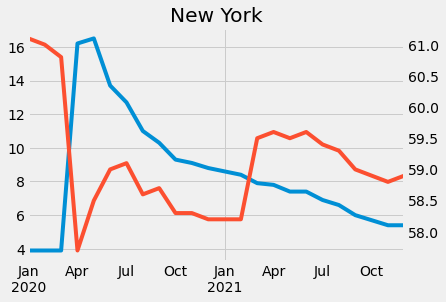

In [37]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
unemp_results.query('index >= 2020 and index < 2022')['New York'].plot(ax=ax, label='Unemployment')
part_states.query('index >= 2020 and index < 2022')['New York'].plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title('New York')

# Itration of the code above to output 50 states plot.

In [38]:
#Fix DC
unemp_results = unemp_results.rename(columns={'the District of Columbia':'District of Columbia'})

In [39]:
unemp_results.columns

Index(['California', 'Texas', 'Florida', 'New York', 'Ohio', 'Pennsylvania',
       'Virginia', 'Alabama', 'Illinois', 'New Jersey', 'Michigan',
       'North Carolina', 'South Carolina', 'Iowa', 'Kentucky', 'Louisiana',
       'Colorado', 'Georgia', 'Wisconsin', 'Indiana', 'Minnesota', 'Arizona',
       'Tennessee', 'Missouri', 'Nevada', 'New Mexico', 'Hawaii', 'Washington',
       'Oregon', 'Massachusetts', 'West Virginia', 'Alaska', 'Mississippi',
       'Arkansas', 'Utah', 'Oklahoma', 'Nebraska', 'Connecticut',
       'North Dakota', 'Maryland', 'Kansas', 'Montana', 'Idaho',
       'South Dakota', 'District of Columbia', 'Maine', 'New Hampshire',
       'Delaware', 'Wyoming', 'Rhode Island', 'Vermont'],
      dtype='object')

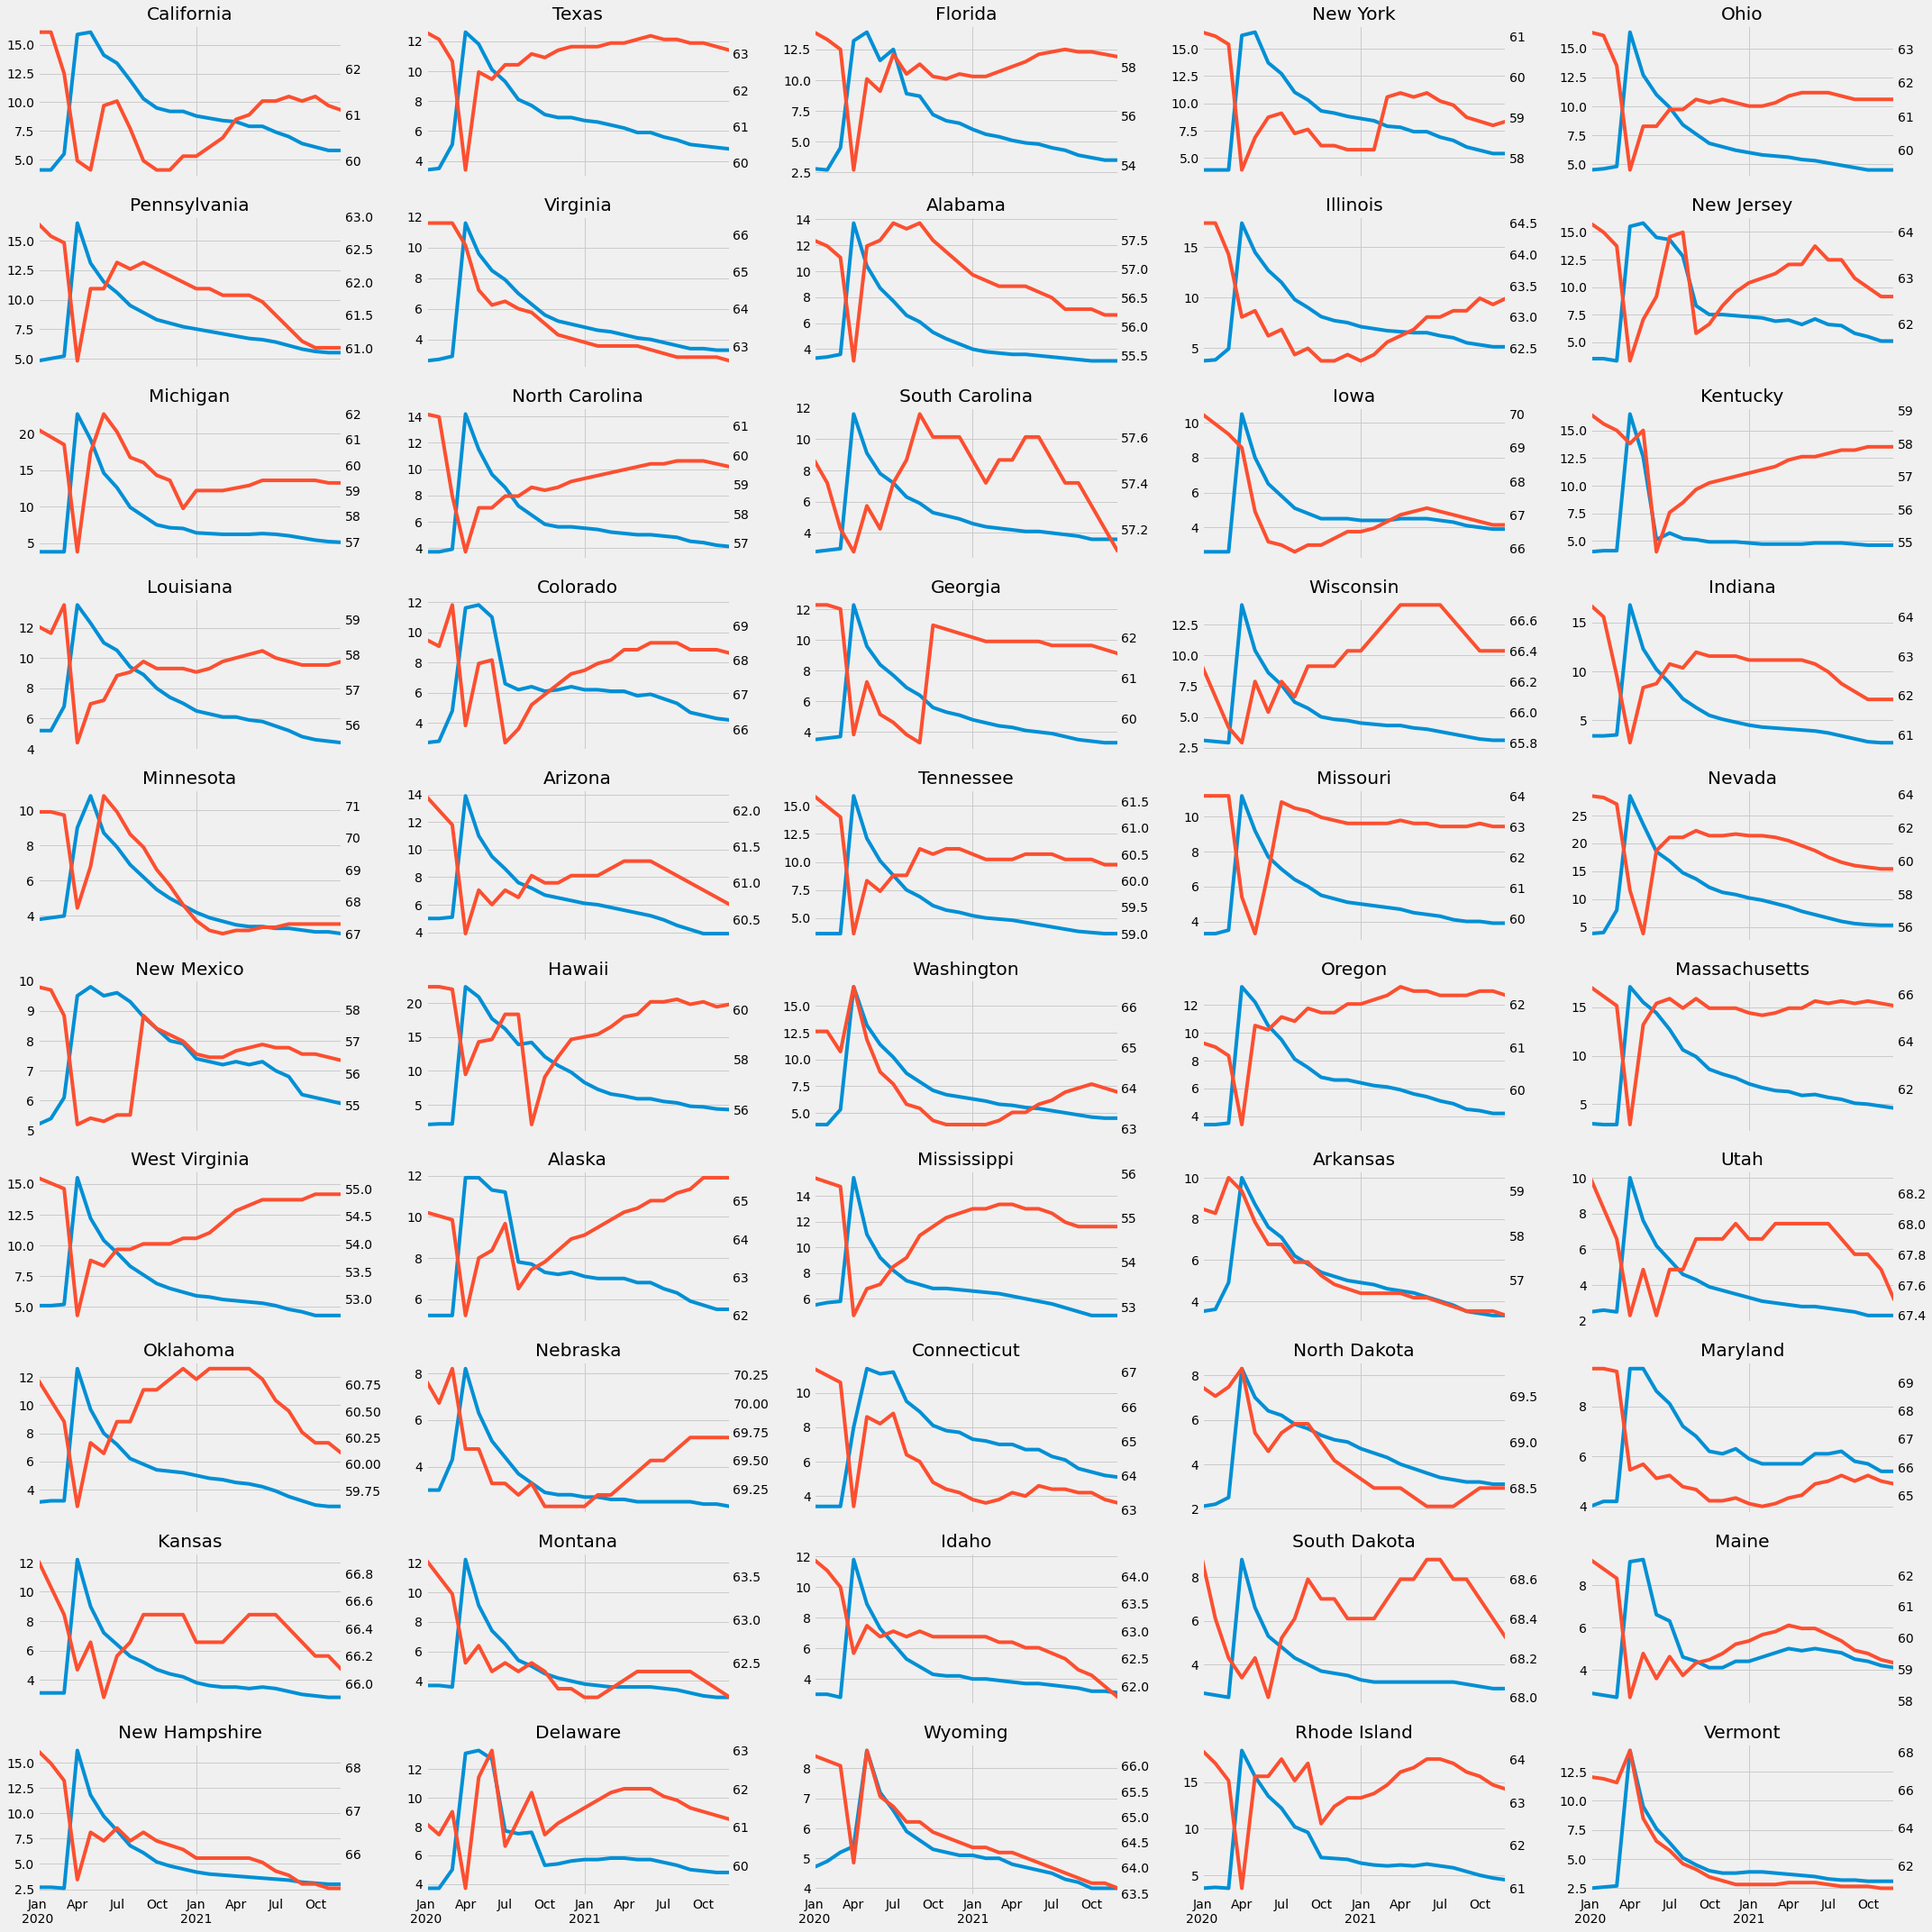

In [40]:
fig, axs = plt.subplots(10, 5, figsize=(30,30), sharex=True)
axs = axs.flatten()

i = 0
for state in unemp_results.columns:
    if state == "District of Columbia":
        continue
    ax2 = axs[i].twinx()
    unemp_results.query('index >= 2020 and index < 2022')[state].plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state].plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    ax.set_title(state)
    axs[i].set_title(state)
    i += 1
    
plt.tight_layout()
plt.show()
